# A Crash Course on ReflectDirect

**Welcome — thanks for downloading!**

`ReflectDirect` is designed for anyone interested in reflected light from directly-imaged planets.

If you want an overview of what it can do, you're in the right place.

Before getting started, make sure you're up to date with:

- Jupyter notebook
- scipy
- matplotlib
- ipywidgets

## A Little Setup

At the simplest level, you need only two statements:

In [1]:
import reflectdirect as refdir

%matplotlib inline

**You should also** put the path to the package folder `'png_maps'` here. It will make importing brightness maps easier. For example:

    map_source = '/Users/Bozo/Some_random_place/ReflectDirect-main/png_maps/'

I recommend putting any other png images you want use into this folder, as well.

In [2]:
map_source = '...../png_maps/

And in case you need them, here are some more imports from inside the module:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.special import sph_harm

import exoplanetsubspots as exoss

pi = np.pi

## Things to Reference

We use some conventions to define how planetary systems are aligned and oriented.

Just run `Geometry_Reference` to get a diagram about them. You can save this diagram by passing `ref_save=True`.

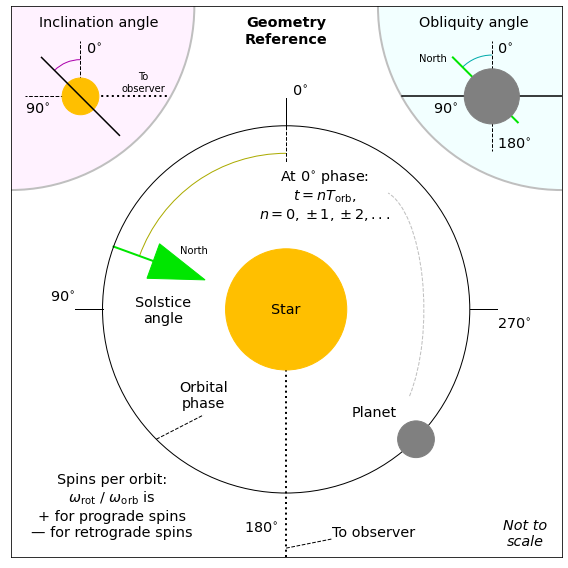

In [4]:
refdir.Geometry_Reference()

The heart of `ReflectDirect` is the class `DirectImaging_Planet`. It's how you create, interact with, and analyze your planets.

All the public methods in our package have full docstrings, so use those "?" for help, such as:

    refdir.DirectImaging_Planet?

Or better yet, browse the class details and more using [the online ReflectDirect API.](https://joelcolinschwartz.github.io/ReflectDirect/)

## Make a Planet

Because `DirectImaging_Planet` is a class, most attributes are adjustable/persistent for each instance you call. That's handy, as you'll see.

We will stick to a single instance in this demo, so choose a value $(1-6)$ for `ex_system_num` to create your planet.

(FYI, there are more images in the `'png_maps'` folder than shown in this demo.)

In [5]:
ex_system_num = 1

### 1: The default spherical harmonics
if ex_system_num == 1:
    planet = refdir.DirectImaging_Planet()

### 2: Different spherical harmonics
elif ex_system_num == 2:
    planet = refdir.DirectImaging_Planet(kind='ylm',mp_data=[[1,0,1.0],[5,-4,1.0],[4,0,1.0]],
                                         primeD=45,alb_lims=[-1,1],name='YLM Ball')
    planet.InvertFlipBlend_Amap(blend='EW')

### 3: A random checkerboard array (Try changing `kind` to 'aryI', too.)
elif ex_system_num == 3:
    an_ary = np.random.random((10,20))
    an_ary[an_ary > 0.5] = 1
    an_ary[an_ary < 1] = 0
    planet = refdir.DirectImaging_Planet(kind='aryA',mp_data=an_ary,name='Checkerboard')

### 4: An Exo-Earth image
elif ex_system_num == 4:
    planet = refdir.DirectImaging_Planet(kind='pngI',mp_data=map_source+'bluemarble_2048.png',
                                         alb_lims=[0.1,0.85],n_clat=91,n_long=181,ratRO=36,
                                         name='Exo-Earth')
    planet.Setup_ProRet_Degeneracy()

### 5: An image with a bright swath, like a glow worm.
elif ex_system_num == 5:
    planet = refdir.DirectImaging_Planet(kind='pngA',mp_data=map_source+'glow_worm.png',
                                         alb_lims=[0,10],name='Glow Worm')
    planet.InvertFlipBlend_Amap(blend='NS')

### 6: Pacman!
elif ex_system_num == 6:
    planet = refdir.DirectImaging_Planet(kind='pngI',mp_data=map_source+'pacman.png',
                                         alb_lims=[0,5],n_clat=181,n_long=361,name='Pacman')
    planet.Adjust_MotionTimes(rot_res=72)
    planet.InvertFlipBlend_Amap(image='pri',into='alt',invert=False,flip='NS',blend='none')

Now use `EquiRect_Amap` to see how your planet looks. By default you get both the primary and alternate brightness maps.

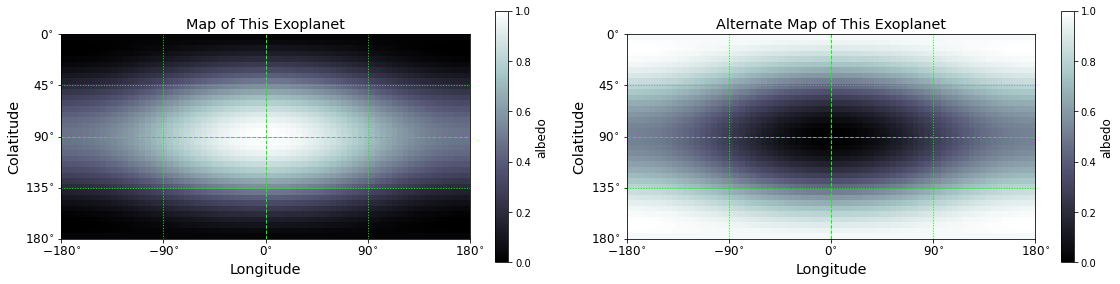

In [6]:
planet.EquiRect_Amap()

At first, your planet has a near-edge-on orbit with no tilt, and its `times` span $-0.5$ to $0.5$ orbits.

One way to change this setup is by using `Adjust_Geometry` and `Adjust_MotionTimes`. Try setting `demo_adjust=True` if you want.

In [7]:
demo_adjust = True

if demo_adjust == True:
    planet.Adjust_Geometry(which='both',incD=63,oblD=35,solD=285)
    planet.Adjust_MotionTimes(which='both',ratRO=3.0,orb_min=0.3,orb_max=3.7)

Then, use `Info_Printout` to view your parameters. It's a quick way to check an instance.

In [8]:
planet.Info_Printout()

Below are some parameters you are using to model This Exoplanet.

  **Grid**       Number      Separation (deg) 
Colatitudes        37              5.00       
Longitudes       72(+1)            5.00       

 **Albedo Map**       Low          Average          High         Realistic?   
Primary              0.000          0.500          1.000            Yes       
Alternate            0.000          0.499          1.000            Yes       

  **Motion**    Orbital Period (units)   Rot./Orb. Frequency    Low t (orbits)    High t (orbits) 
Primary                8640.000                 3.0000              0.3000            3.7000      
Alternate              8640.000                 3.0000            ((0.3000))        ((3.7000))    

 **Geometry**   Inclination (deg)    Obliquity (deg)     Solstice (deg)    t=0 Longitude (deg)  
Primary               63.00               35.00              285.00                0.00         
Alternate             63.00               35.00              2

## Analyze Your System

Let's test more features of the class `DirectImaging_Planet`. You can run these things in any order.

Also, if you check the API, you'll see that several methods store their figures. Those attributes are each `fig_****` — replace the stars with the first 4-5 letters of the method (all lowercase).

#### Geometry

Use `Geometry_Diagram` for an overhead view of the system (like the reference diagram):

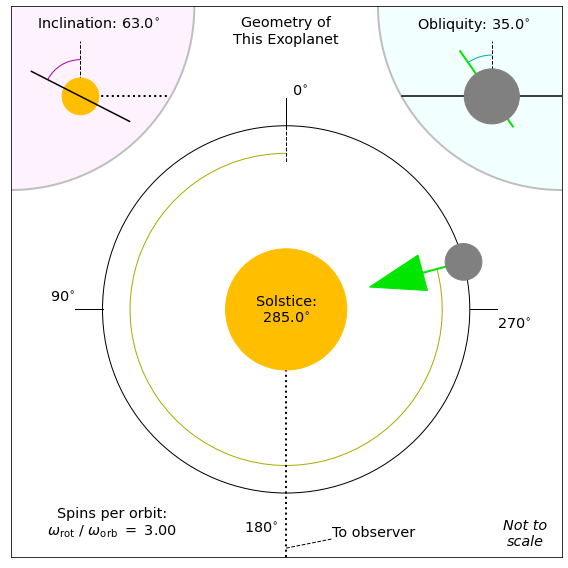

In [9]:
planet.Geometry_Diagram()

Or see things on the observer's line of sight with `Orthographic_Viewer`. Just pass your orbital phase in degrees.

There are different viewing styles here — try `show='real'` for example.

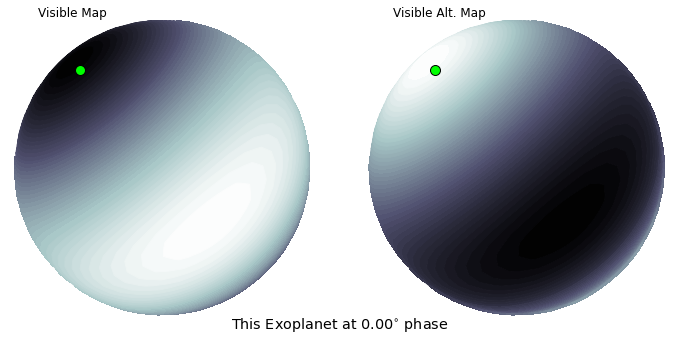

In [10]:
planet.Orthographic_Viewer(0,show='amap',alt=True)

#### Light Curve

Graph some light curves with `LightCurve_Plot`, which uses the attribute `times`.

There are different viewing styles here too — try `show='appar'` for example.

(If you want to return actual data, use `Light_Curves` instead.)

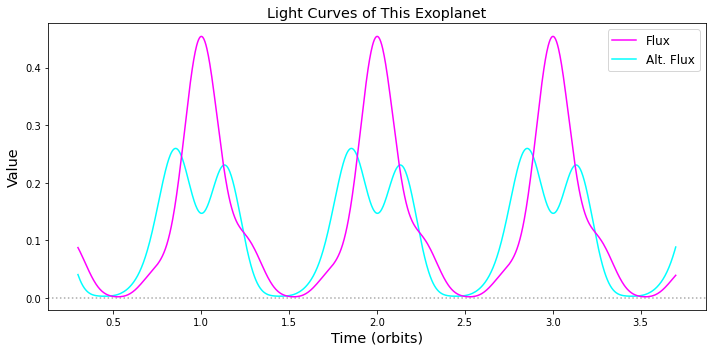

In [11]:
planet.LightCurve_Plot(alt=True,diff=False,show='flux')

#### Kernel

The kernel represents spots on your planet that are visible *and* lit up.

Want its details at a given phase? Use `Kernels_Plot`.

Add a faint version of your map with `over_amap=True`.

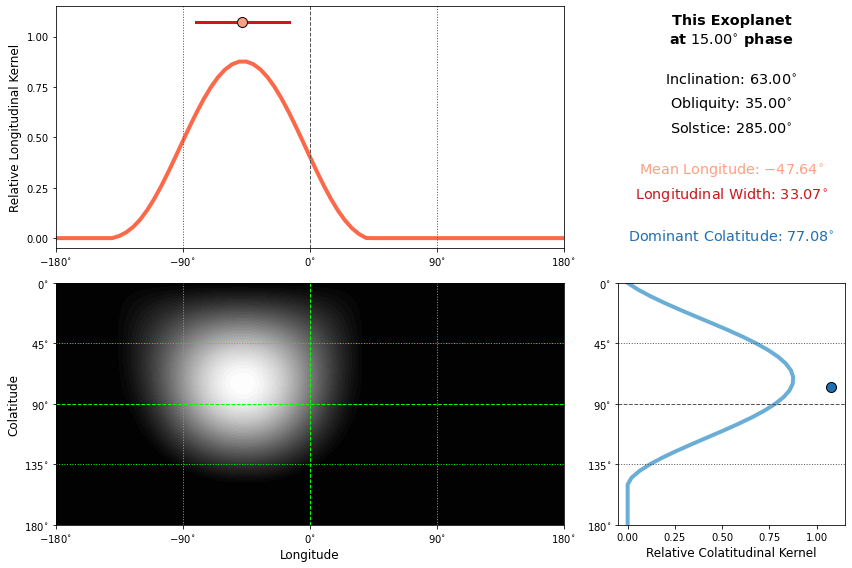

In [12]:
planet.Kernels_Plot(15,over_amap=False)

Or, see how the kernel characteristics evolve over an orbit with `KChar_Evolve_Plot`.

Try passing `'dom'` or `explode='obl'`, for example.

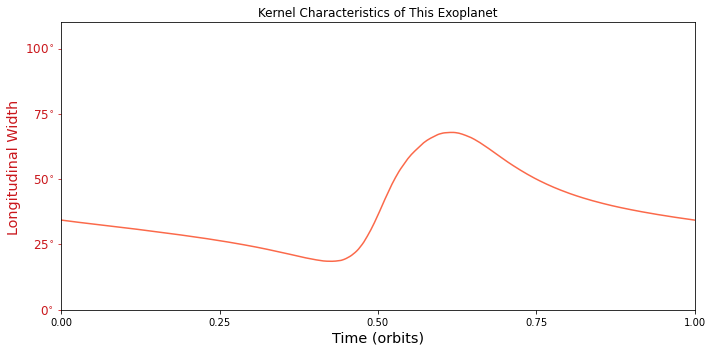

In [13]:
planet.KChar_Evolve_Plot('wid',explode='none',gap=10)

#### Spin Axis

With `SpinAxis_Constraints`, you can predict how real observations might constrain your planet's spin axis. It's all based on the kernel.

Also try `constraint='real'`, which takes longer to calculate but gives you $n$-sigma regions.

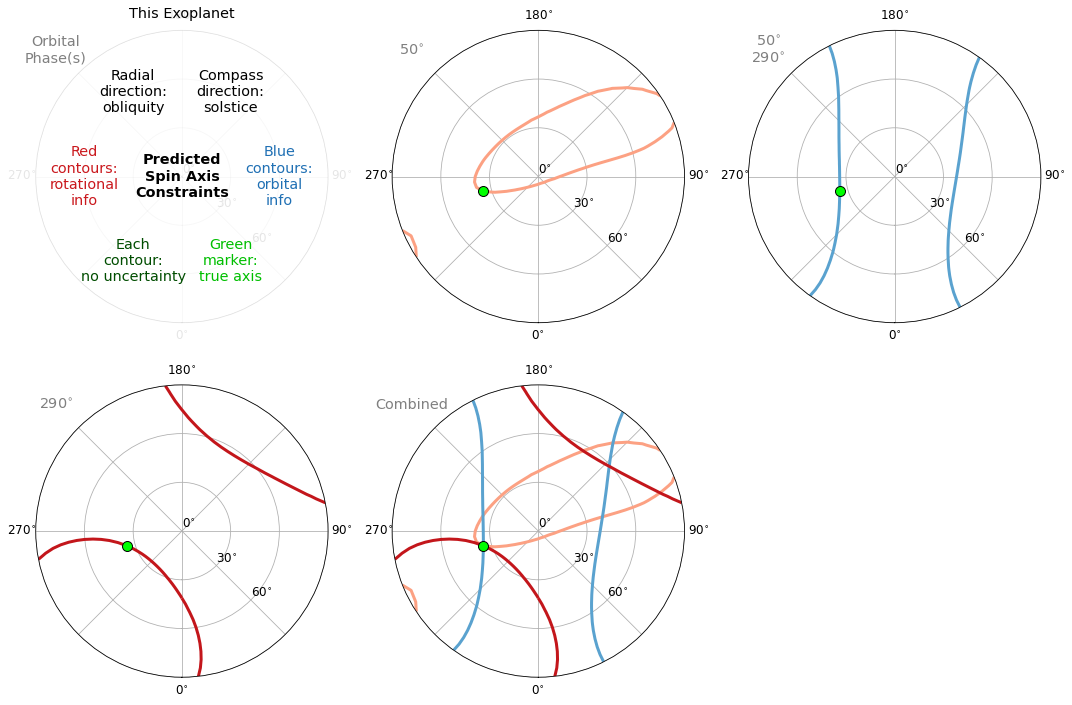

In [14]:
planet.SpinAxis_Constraints(phaseD_list=[50,[50,290],290],constraint='perf')

## Play in the Sand(box)

The primary and alternate parameters are useful. You can compare and contrast specific maps, spin rates, axis alignments, and much more with them.

But sometimes you just want to mess around! That's what `Sandbox_Reflection` is for. It combines several methods into one and gives you a bunch of interactive controls.

The markdown cell below is a sample image. **If you want to give it a go, change the image cell to code and write:**

    planet.Sandbox_Reflection()

And protip, use the extra slots. You get up to 4 phases at a time that way.

![Sandbox_Reflection example](sandbox_example.png)

## Just One More Thing...

This demo covers a lot of `ReflectDirect` options, but not everything.

**[Check out the API](https://joelcolinschwartz.github.io/ReflectDirect/) and method docstrings for all the details.** Can't stress that enough.

Enjoy!

#### *Questions/Comments/Feedback?*

*Email to:* joelcolinschwartz@gmail.com

*And find more:* [joelcolinschwartz.com](http://joelcolinschwartz.com)